In [1]:
import os
import pandas as pd

In [6]:
#Vamos a generar un nuevo conjunto de datos de solo 200 registros, lo obgtendremos de manera aleatoria de nuestro dataset de prueba
os.chdir('/content/drive/MyDrive/data_fraud')

In [7]:
prueba = pd.read_csv('test.csv')

In [8]:
# primero veamos que proporción tenemos de 'is fraud'
prueba['isFraud'].value_counts()

,count
isFraud,
0,40001
1,4132


In [12]:
# Listo, ahora podemos generar nuestro subconjunto aleatorio, para poder utilizarlo como si fueran nuestros datos nuevos

muestra = prueba.sample(n=200, random_state=42)


In [13]:
#Comprobemos que tenemos casos de fraude en este subconjunto de datos
muestra['isFraud'].value_counts()

,count
isFraud,
0,179
1,21


In [14]:
# Y listo, ahora salvemos este subconjunto de datos como un csv
muestra.to_csv('new_data.csv')


Ahora que ya tenemos nuestros "datos nuevos" vamos a llamar a nuestro modelo y las funciones que hacen que funcione bien

In [34]:
os.chdir('/content/drive/MyDrive')

In [35]:
from custom_pipeline import DropColumns, ThresholdClassifier, log_transform, inverse_log_transform, sqrt_transform

In [36]:
from joblib import load

In [37]:
pipeline_final_xgb = load('models_fraud/pipeline_final_xgb.joblib')

In [38]:
new_data = pd.read_csv('data_fraud/new_data.csv')

In [39]:
X_new = new_data.drop(columns=['isFraud'])
y_new = new_data['isFraud']

In [40]:
# Hacemos nuestras predicciones
y_pred_new = pipeline_final_xgb.predict(X_new)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [41]:
print(y_pred_new)

[1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0]


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [43]:
# Veamos nuestro rendimiento con "los nuevos datos"
print(classification_report(y_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       179
           1       0.36      0.86      0.51        21

    accuracy                           0.82       200
   macro avg       0.67      0.84      0.70       200
weighted avg       0.91      0.82      0.85       200



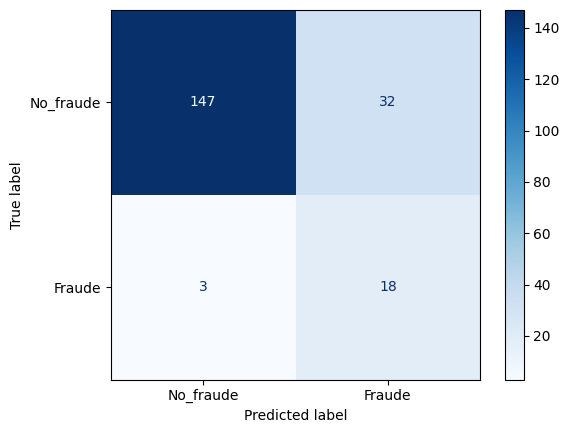

Accuracy: 0.825
Recall: 0.8571428571428571
Confusion Matrix: 
[[147  32]
 [  3  18]]


In [46]:
acc = accuracy_score(y_new, y_pred_new)
rec = recall_score(y_new, y_pred_new)
conf_m = confusion_matrix(y_new, y_pred_new)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_m,
                                    display_labels=['No_fraude', 'Fraude']) # Reemplaza con tus etiquetas
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

print(f'Accuracy: {acc}')
print(f'Recall: {rec}')
print(f'Confusion Matrix: \n{conf_m}')

Podemos ver que se estan detectando correctamente 18 fraudes de 21, es una buena señal de que estamos cumpliendo nuestro objetivo de detección de fraudes, en consecuencia estamos clasificando erróneamente cerca del 18% de transacciones legítimas como fraudulentas, aquí deberían actuar nuestras otras medidas de verificación para autorizar dichas transacciones legales.